In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
import numpy as np

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old



Using TensorFlow backend.


In [ ]:
from keras import models
from keras import layers
from keras import regularizers
metric = 'accuracy'

def Models(num):
    models = dict()
    models[0] = build_model0
    models[1] = build_model1
    models[2] = build_model2
    models[3] = build_model3
    return models[num]
        

def build_model0(units,layerz,metric,shape):
    model = models.Sequential()
    model.add(layers.Dense(units, activation = 'relu', 
                           input_shape = (shape,)))
    for layer in range(layerz):
        model.add(layers.Dense(units, activation = 'relu'))
    model.add(layers.Dense(1)) #linear layer
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics =[metric] )
    return model

def build_model1(units,layerz,metric,shape): # regularizaion
    model = models.Sequential()
    model.add(layers.Dense(units, activation = 'relu', kernel_regularizer = regularizers.l2(0.001),
                           input_shape = (shape,)))
    for layer in range(layerz):
        model.add(layers.Dense(units, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(layers.Dense(1)) #linear layer
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics =[metric] )
    return model

def build_model2(units,layerz,metric,shape): #dropout
    model = models.Sequential()
    model.add(layers.Dense(units, activation = 'relu',
                           input_shape = (shape,)))
    model.add(layers.Dropout(0.5))
    for layer in range(layerz):
        model.add(layers.Dense(units, activation = 'relu'))
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1)) #linear layer
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics =[metric] )
    return model

def build_model3(units,layerz,metric,shape): # all use all
    model = models.Sequential()
    model.add(layers.Dense(units, activation = 'relu', kernel_regularizer = regularizers.l2(0.001),
                           input_shape = (shape,)))
    model.add(layers.Dropout(0.5))
    for layer in range(layerz):
        model.add(layers.Dense(units, activation = 'relu',kernel_regularizer = regularizers.l2(0.001)))
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1)) #linear layer
    model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics =[metric] )
    return model   

def vectorize_sequences(sequences, dimension = 10000):
    results  = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

Original model

In [3]:
def vectorize_sequences(sequences, dimension = 10000):
    results  = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [4]:
def Histories(num):
    build_model = Models(num)
    model0 = build_model(50,1,metric,10000) # origianl
    model1 = build_model(40, 2,metric,10000) # small capacity
    model2 = build_model(64,1,metric,10000) # big capacity
    model3 = build_model(512,1,metric,10000) # huge capacity
    modelz = [model0, model1,model2,model3]
    histories = []
    for model in modelz:
        histories.append(
            model.fit(partial_x_train, partial_y_train, epochs=100, batch_size = 512, verbose = 0,validation_data = (x_val,y_val)).history
        )
    return histories

In [ ]:
import matplotlib.pyplot as plt

def plot(histories):
    epochs = range(1,len(histories[0]["val_loss"])+1)
    color = ["b","r","g","k"]
    name = ["original","small", "big", "huge"]
    plt.figure(figsize=(12,12))
    plt.title('overfitting with different size capacity')
    plt.xlabel('Epochs')
    plt.ylabel('Validation loss')
    for i,history in enumerate(histories):

        plt.plot(epochs[3:], history["val_loss"][3:], color[i], label=name[i]) 
        plt.legend()
        print(name[i] + " capacity min " + str(np.min(history["val_loss"])) +" loss")
        print()
        print(name[i] + " capacity max " + str(np.max(history["val_acc"])) +" acc")
        print()
    plt.show()


In [11]:
histories = Histories(0)

original capacity min 0.40773162565231325 loss

original capacity max 0.8173999995231629 acc

small capacity min 0.414326150894165 loss

small capacity max 0.8060999995231628 acc

big capacity min 0.48091884956359865 loss

big capacity max 0.7526999996185303 acc

huge capacity min 0.3836650587081909 loss

huge capacity max 0.8116999998092651 acc



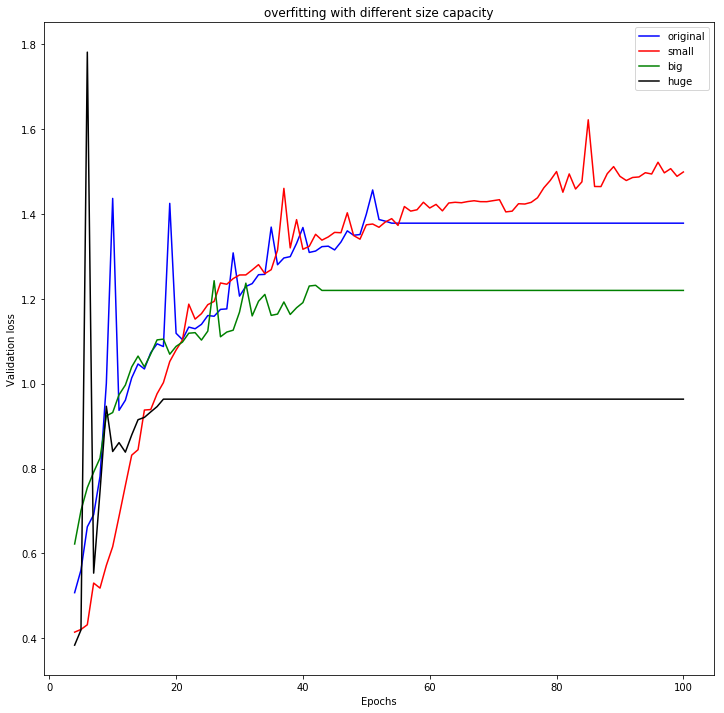

In [12]:
plot(histories)

The smallest capacity had the best performance

Let's try regularization

In [13]:
histories_reg = Histories(1)

original capacity min 0.48122566833496094 loss

original capacity max 0.7550999999046326 acc

small capacity min 0.3820143942832947 loss

small capacity max 0.8499999994277954 acc

big capacity min 0.5660517525672912 loss

big capacity max 0.7837999997138977 acc

huge capacity min 0.5333242778301239 loss

huge capacity max 0.762000000667572 acc



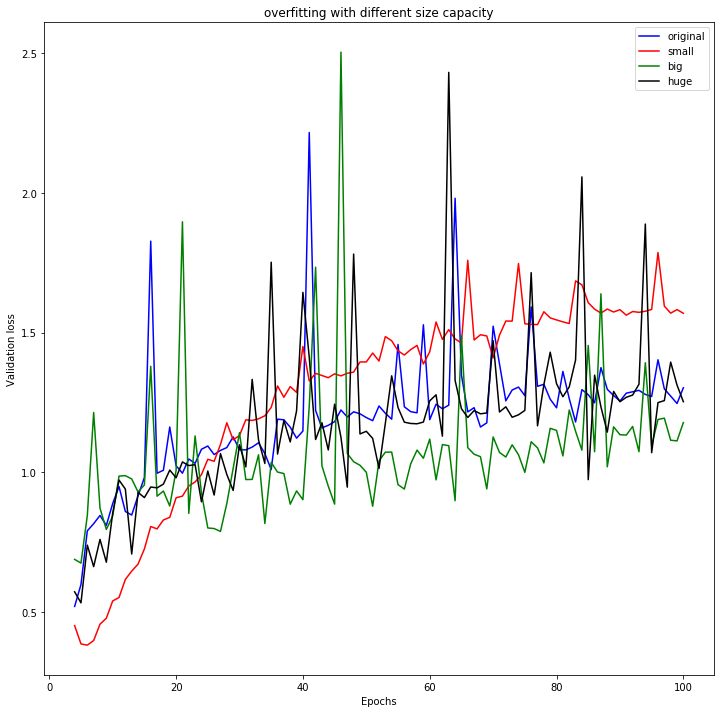

In [14]:
plot(histories_reg)

In [15]:
histories_dropout = Histories(2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


original capacity min 0.4247202501296997 loss

original capacity max 0.7807999993324279 acc

small capacity min 8.144476538085938 loss

small capacity max 0.4947000000476837 acc

big capacity min 0.37841927914619444 loss

big capacity max 0.8272000002861023 acc

huge capacity min 0.37648212156295774 loss

huge capacity max 0.8025999997138977 acc



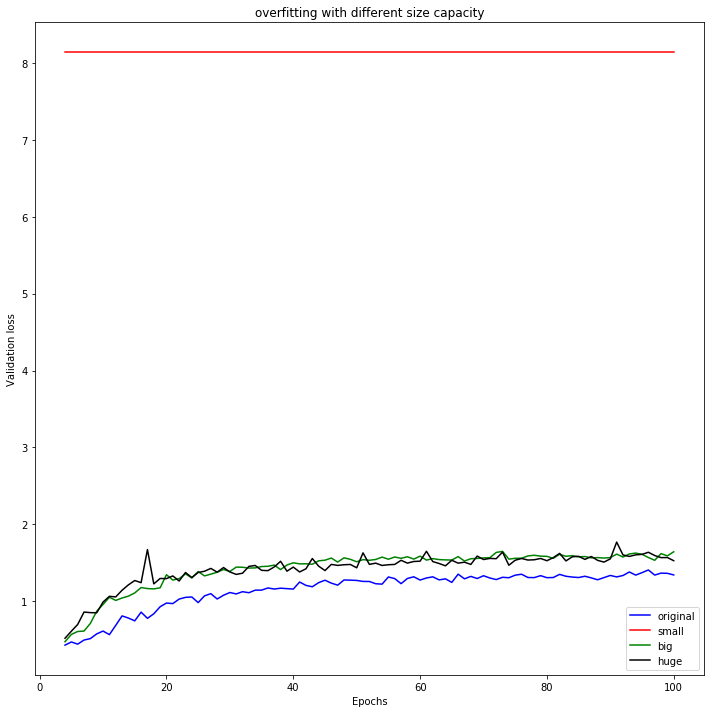

In [16]:
plot(histories_dropout)

In [17]:
histories_all = Histories(3)

TypeError: add() got an unexpected keyword argument 'kernel_regularizer'

In [ ]:
plot(histories_all)